In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing dataset
df=pd.read_csv("D:\\dataset\\Micro Credit Project\\Car Price Prediction\\buy_car.csv")
df.head()

Unnamed: 0                             brand fuel_types   total_run  \
0           0      Maruti Suzuki Wagon R (2021)     PETROL      1.0 KM   
1           1       Maruti Suzuki Estilo (2010)     PETROL  40082.0 KM   
2           2               Bmw 5 Series (2012)     DIESEL  52000.0 KM   
3           3  Maruti Suzuki Swift Dzire (2009)     DIESEL   140000 KM   
4           4       Maruti Suzuki Ertiga (2013)     DIESEL    70000 KM   

      engine no_of_owner        varient                  location        price  
0     MANUAL          --            LXI        Malad West, Mumbai   ₹ 5,50,435  
1     MANUAL          --            VXi       Panth Nagar, Mumbai   ₹ 2,30,000  
2  AUTOMATIC         2nd           520d      Swarup Nagar, Nagpur  ₹ 15,51,000  
3     MANUAL      Fourth            VDI  Dahigaon Korhale, Rahata   ₹ 3,00,000  
4     MANUAL       First  2012-2015 VDI       Mulund West, Mumbai   ₹ 5,50,000

In [3]:
df.shape

(8000, 9)

In [4]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8000 non-null   int64 
 1   brand        8000 non-null   object
 2   fuel_types   8000 non-null   object
 3   total_run    8000 non-null   object
 4   engine       8000 non-null   object
 5   no_of_owner  8000 non-null   object
 6   varient      7516 non-null   object
 7   location     8000 non-null   object
 8   price        8000 non-null   object
dtypes: int64(1), object(8)
memory usage: 562.6+ KB


as the datatype is not correct we need to take care of that

In [5]:
#checking unique in dataset
df.nunique().to_frame()

0
Unnamed: 0   8000
brand        1754
fuel_types      8
total_run    1987
engine          3
no_of_owner    10
varient      2204
location     3764
price        1005

# data cleaning

In [6]:
df["Manufacturing Year"] = df['brand'].str.split().str[-1]

df['Brand'] = df['brand'].str.split(" ",1).str[0]

df['Model'] = df['brand'].str.split(" ",1).str[1]

df['Model']=df['Model'].str.split("(").str[0]

df['Brand'].replace("Maruti","Maruti Suzuki",inplace=True)

df['Model'].replace("Suzuki ","",inplace=True)

df['Model'] = df['Model'].str.replace("Suzuki ","")


In [7]:
#splitting data to make it into correct datatype
df['price']=df['price'].str.split().str[1]
df['price'].replace(',','',inplace=True)

In [8]:
#splitting data to make it into correct datatype
df['Manufacturing Year']=df['Manufacturing Year'].str.split('(').str[1]
df['Manufacturing Year']=df['Manufacturing Year'].str.split(')').str[0]

In [9]:
#splitting data to make it into correct datatype
df['total_run']=df['total_run'].str[0]
df['total_run']=df['total_run'].str.split().str[0]

In [10]:
#splitting data to make it into correct datatype
df["location"]=df["location"].str.split().str[-1]

In [11]:
df["price"]=df["price"].str.replace(',','')

In [12]:
# manually replacing no_of owner
df['no_of_owner'].replace("First",1,inplace=True)
df['no_of_owner'].replace("1st",1,inplace=True)
df['no_of_owner'].replace("2nd",2,inplace=True)
df['no_of_owner'].replace("Second",2,inplace=True)
df['no_of_owner'].replace("Third",3,inplace=True)
df['no_of_owner'].replace("3rd",3,inplace=True)
df['no_of_owner'].replace("Fourth",4,inplace=True)
df['no_of_owner'].replace("4th",4,inplace=True)
df['no_of_owner'].replace("4+",5,inplace=True)
df['no_of_owner'].replace("--",None,inplace=True)
df['no_of_owner'].replace('--',np.nan,inplace=True)

In [13]:
#manually replacing fuel_type
df['fuel_types'].replace("PETROL",1,inplace=True)
df['fuel_types'].replace("DIESEL",2,inplace=True)
df['fuel_types'].replace("CNG & HYBRIDS",3,inplace=True)
df['fuel_types'].replace("CNG",4,inplace=True)
df['fuel_types'].replace("LPG",5,inplace=True)
df['fuel_types'].replace("ELECTRIC",1,inplace=True)
df['fuel_types'].replace("PETROL/COMPRESSED NATURAL GAS",1,inplace=True)
df['fuel_types'].replace('--',np.nan,inplace=True)

In [14]:
# manually replacing engine
df['engine'].replace("MANUAL",1,inplace=True)
df['engine'].replace("AUTOMATIC",2,inplace=True)
df['engine'].replace('--',np.nan,inplace=True)

In [15]:
df

Unnamed: 0                             brand  fuel_types total_run  \
0              0      Maruti Suzuki Wagon R (2021)         1.0         1   
1              1       Maruti Suzuki Estilo (2010)         1.0         4   
2              2               Bmw 5 Series (2012)         2.0         5   
3              3  Maruti Suzuki Swift Dzire (2009)         2.0         1   
4              4       Maruti Suzuki Ertiga (2013)         2.0         7   
...          ...                               ...         ...       ...   
7995        7995                Hyundai I20 (2009)         1.0         7   
7996        7996             Ford Endeavour (2016)         2.0         7   
7997        7997                Honda Amaze (2014)         1.0         6   
7998        7998        Hyundai Santro Xing (2010)         1.0         1   
7999        7999                    Audi A6 (2012)         2.0         6   

      engine  no_of_owner                varient  location    price  \
0        1.0          NaN                    LXI    Mumbai   550435   
1        1.0          NaN                    VXi    Mumbai   230000   
2        2.0          2.0                   520d    Nagpur  1551000   
3        1.0          4.0                    VDI    Rahata   300000   
4        1.0          1.0          2012-2015 VDI    Mumbai   550000   
...      ...          ...                    ...       ...      ...   
7995     1.0          2.0    1.4 Magna Executive  Dehradun   190000   
7996     1.0          2.0       2.2 Trend MT 4X2  Dehradun  2200000   
7997     1.0          1.0    2013-2016 E i-Vtech  Dehradun   370000   
7998     1.0          2.0                GLS LPG   Lalkuan   165000   
7999     1.0          1.0  2.0 TFSI Premium Plus  Dehradun  1450000   

     Manufacturing Year          Brand         Model  
0                  2021  Maruti Suzuki      Wagon R   
1                  2010  Maruti Suzuki       Estilo   
2                  2012            Bmw     5 Series   
3                  2009  Maruti Suzuki  Swift Dzire   
4                  2013  Maruti Suzuki       Ertiga   
...                 ...            ...           ...  
7995               2009        Hyundai          I20   
7996               2016           Ford    Endeavour   
7997               2014          Honda        Amaze   
7998               2010        Hyundai  Santro Xing   
7999               2012           Audi           A6   

[8000 rows x 12 columns]

In [16]:
#chaning datatype of respected columns
l=["total_run","price","Manufacturing Year"]

In [17]:
for i in df[l]:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [18]:
#datatype changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8000 non-null   int64  
 1   brand               8000 non-null   object 
 2   fuel_types          7943 non-null   float64
 3   total_run           8000 non-null   int64  
 4   engine              7825 non-null   float64
 5   no_of_owner         7998 non-null   float64
 6   varient             7516 non-null   object 
 7   location            8000 non-null   object 
 8   price               8000 non-null   int64  
 9   Manufacturing Year  8000 non-null   float64
 10  Brand               8000 non-null   object 
 11  Model               8000 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 750.1+ KB


# analysis

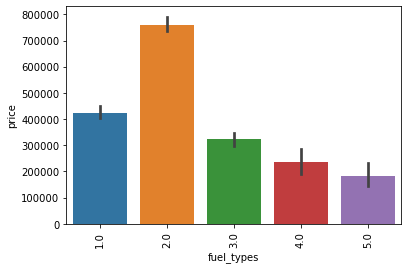

In [19]:
sns.barplot(y=df["price"],x=df["fuel_types"])
plt.xticks(rotation=90)
plt.show()

prices are high for petrol and diesel

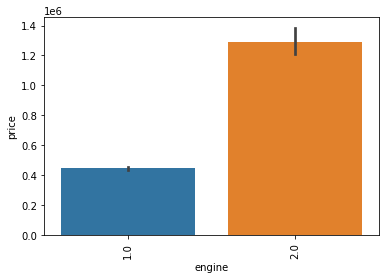

In [20]:
sns.barplot(x=df["engine"],y=df["price"])
plt.xticks(rotation=90)
plt.show()

prices are high for automatic vehicle

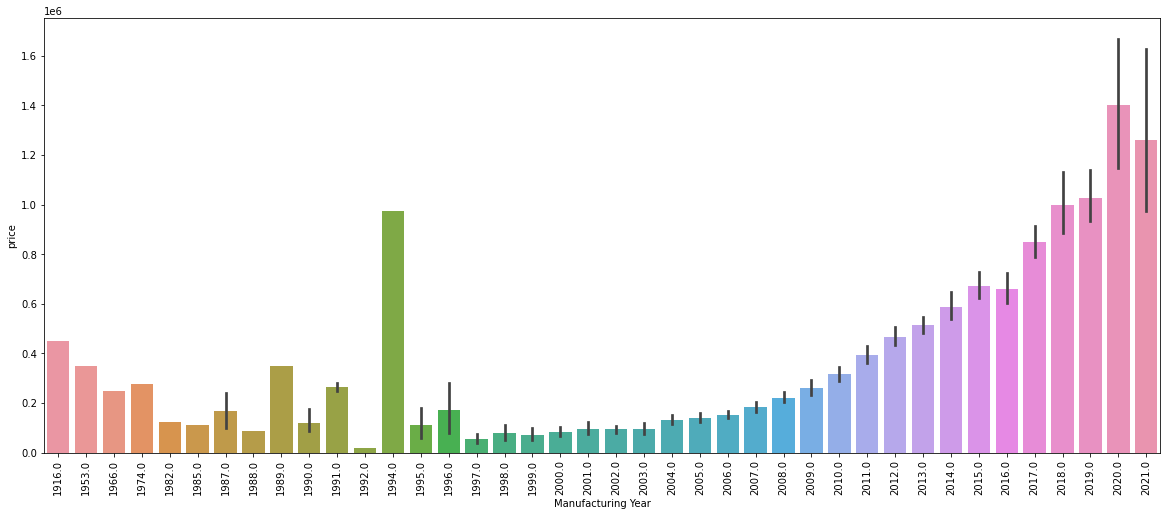

In [21]:
plt.figure(figsize=(20,8))
sns.barplot(x=df["Manufacturing Year"],y=df["price"])
plt.xticks(rotation=90)
plt.show()

prices are high for vehicle sold in the year 2020-21

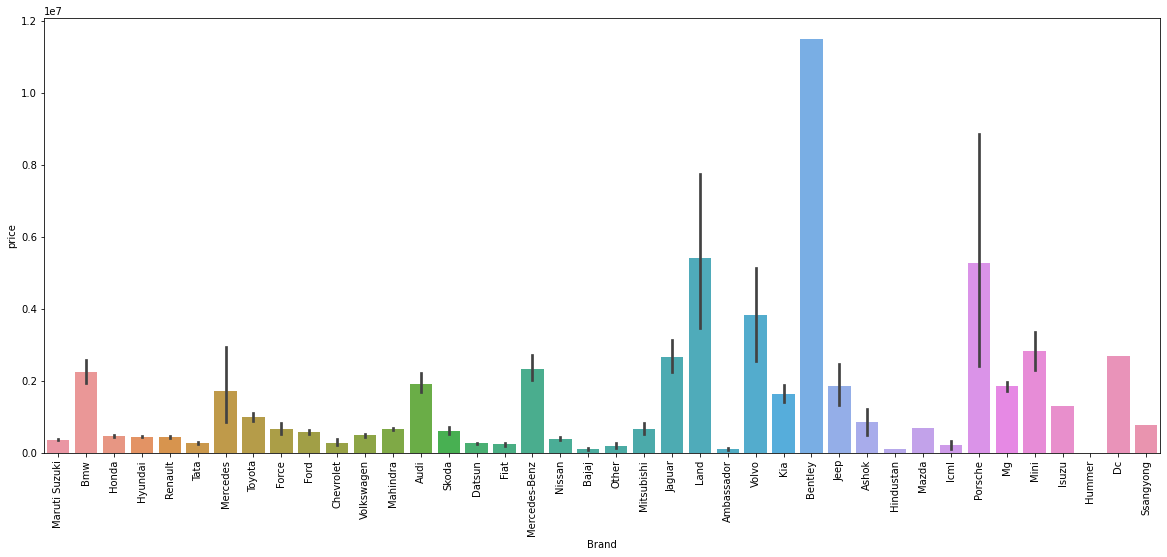

In [22]:
plt.figure(figsize=(20,8))
sns.barplot(x=df["Brand"],y=df["price"])
plt.xticks(rotation=90)
plt.show()

prices are high for bentley then porsche

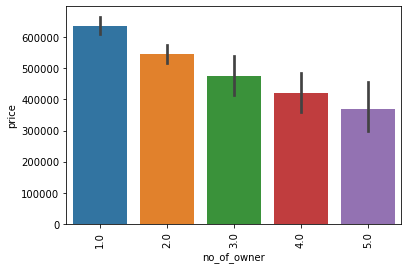

In [23]:
sns.barplot(x=df["no_of_owner"],y=df["price"])
plt.xticks(rotation=90)
plt.show()

prices are high for first owner 

In [24]:
#checking nan value
df.isna().sum()

Unnamed: 0              0
brand                   0
fuel_types             57
total_run               0
engine                175
no_of_owner             2
varient               484
location                0
price                   0
Manufacturing Year      0
Brand                   0
Model                   0
dtype: int64

In [25]:
#checking basic summary of dataset
df.describe()

Unnamed: 0   fuel_types    total_run       engine  no_of_owner  \
count  8000.00000  7943.000000  8000.000000  7825.000000  7998.000000   
mean   3999.50000     1.616895     4.665125     1.179553     1.505626   
std    2309.54541     0.632497     2.677850     0.383839     0.767220   
min       0.00000     1.000000     0.000000     1.000000     1.000000   
25%    1999.75000     1.000000     2.000000     1.000000     1.000000   
50%    3999.50000     2.000000     5.000000     1.000000     1.000000   
75%    5999.25000     2.000000     7.000000     1.000000     2.000000   
max    7999.00000     5.000000     9.000000     2.000000     5.000000   

              price  Manufacturing Year  
count  8.000000e+03         8000.000000  
mean   5.943948e+05         2013.231250  
std    8.768912e+05            4.710366  
min    1.500000e+04         1916.000000  
25%    2.300000e+05         2011.000000  
50%    3.990000e+05         2014.000000  
75%    6.500000e+05         2017.000000  
max    2.250000e+07         2021.000000

In [34]:
#droping unwanted columns
df.drop(columns=['Unnamed: 0','brand'],axis=1,inplace=True)

In [35]:
#droping nan value
df.dropna(inplace=True,axis=0)

In [36]:
df.shape

(7405, 10)

In [37]:
df

fuel_types  total_run  engine  no_of_owner                varient  \
2            2.0          5     2.0          2.0                   520d   
3            2.0          1     1.0          4.0                    VDI   
4            2.0          7     1.0          1.0          2012-2015 VDI   
6            1.0          5     1.0          1.0              i-VTEC SV   
7            1.0          1     1.0          1.0                  Magna   
...          ...        ...     ...          ...                    ...   
7995         1.0          7     1.0          2.0    1.4 Magna Executive   
7996         2.0          7     1.0          2.0       2.2 Trend MT 4X2   
7997         1.0          6     1.0          1.0    2013-2016 E i-Vtech   
7998         1.0          1     1.0          2.0                GLS LPG   
7999         2.0          6     1.0          1.0  2.0 TFSI Premium Plus   

      location    price  Manufacturing Year          Brand         Model  
2       Nagpur  1551000              2012.0            Bmw     5 Series   
3       Rahata   300000              2009.0  Maruti Suzuki  Swift Dzire   
4       Mumbai   550000              2013.0  Maruti Suzuki       Ertiga   
6       Mumbai   715000              2016.0          Honda         City   
7       Mumbai   194999              2010.0        Hyundai          I10   
...        ...      ...                 ...            ...           ...  
7995  Dehradun   190000              2009.0        Hyundai          I20   
7996  Dehradun  2200000              2016.0           Ford    Endeavour   
7997  Dehradun   370000              2014.0          Honda        Amaze   
7998   Lalkuan   165000              2010.0        Hyundai  Santro Xing   
7999  Dehradun  1450000              2012.0           Audi           A6   

[7405 rows x 10 columns]

In [38]:
#encoding columns
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [39]:
col=["location","Brand","Model","varient"]

In [40]:
for i in df[col]:
    df[[i]] = label.fit_transform(df[[i]])

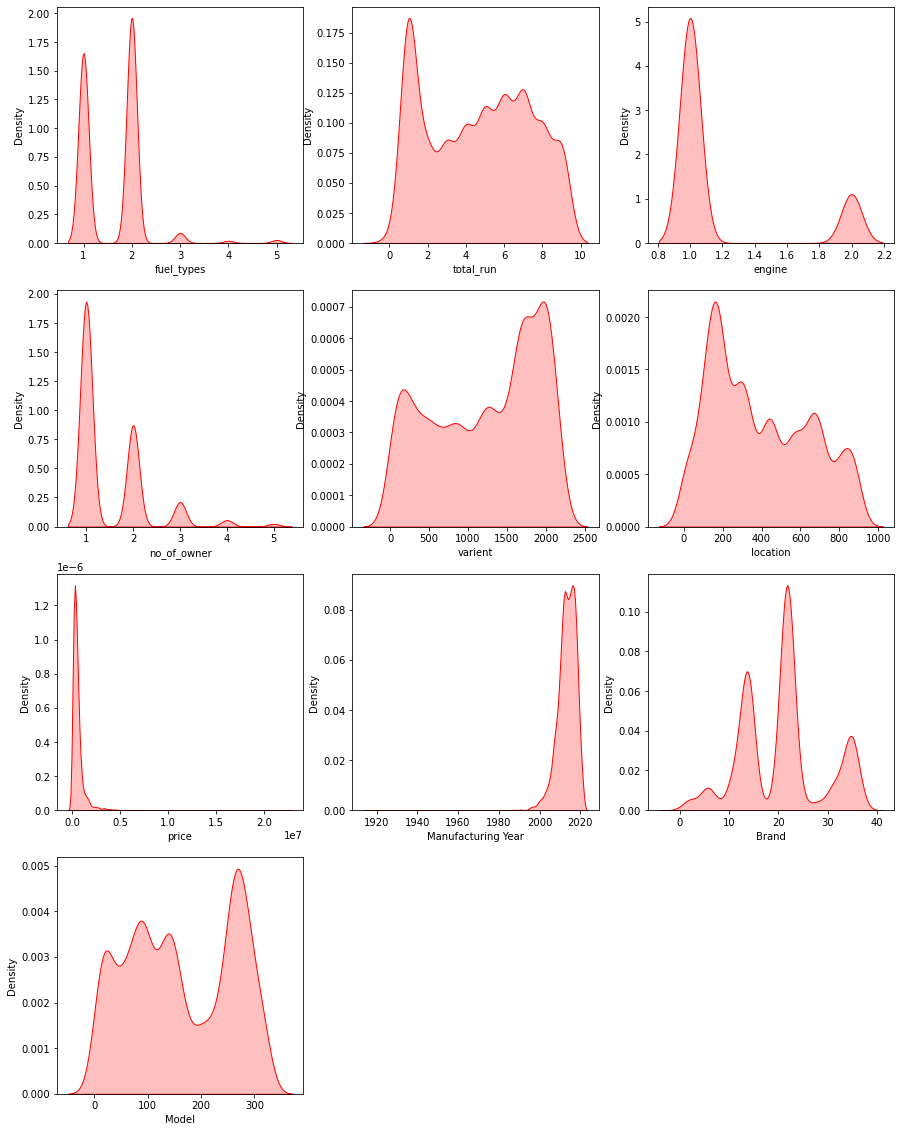

In [41]:
#univariate analysis
plotnumber = 1
plt.figure(figsize=(15,20))
for i in df:
    if plotnumber < 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.kdeplot(df[i],data=df,color='r',fill=True)
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

as most of the column is uniformly distributed but we see little skewness in price and manufacturing year

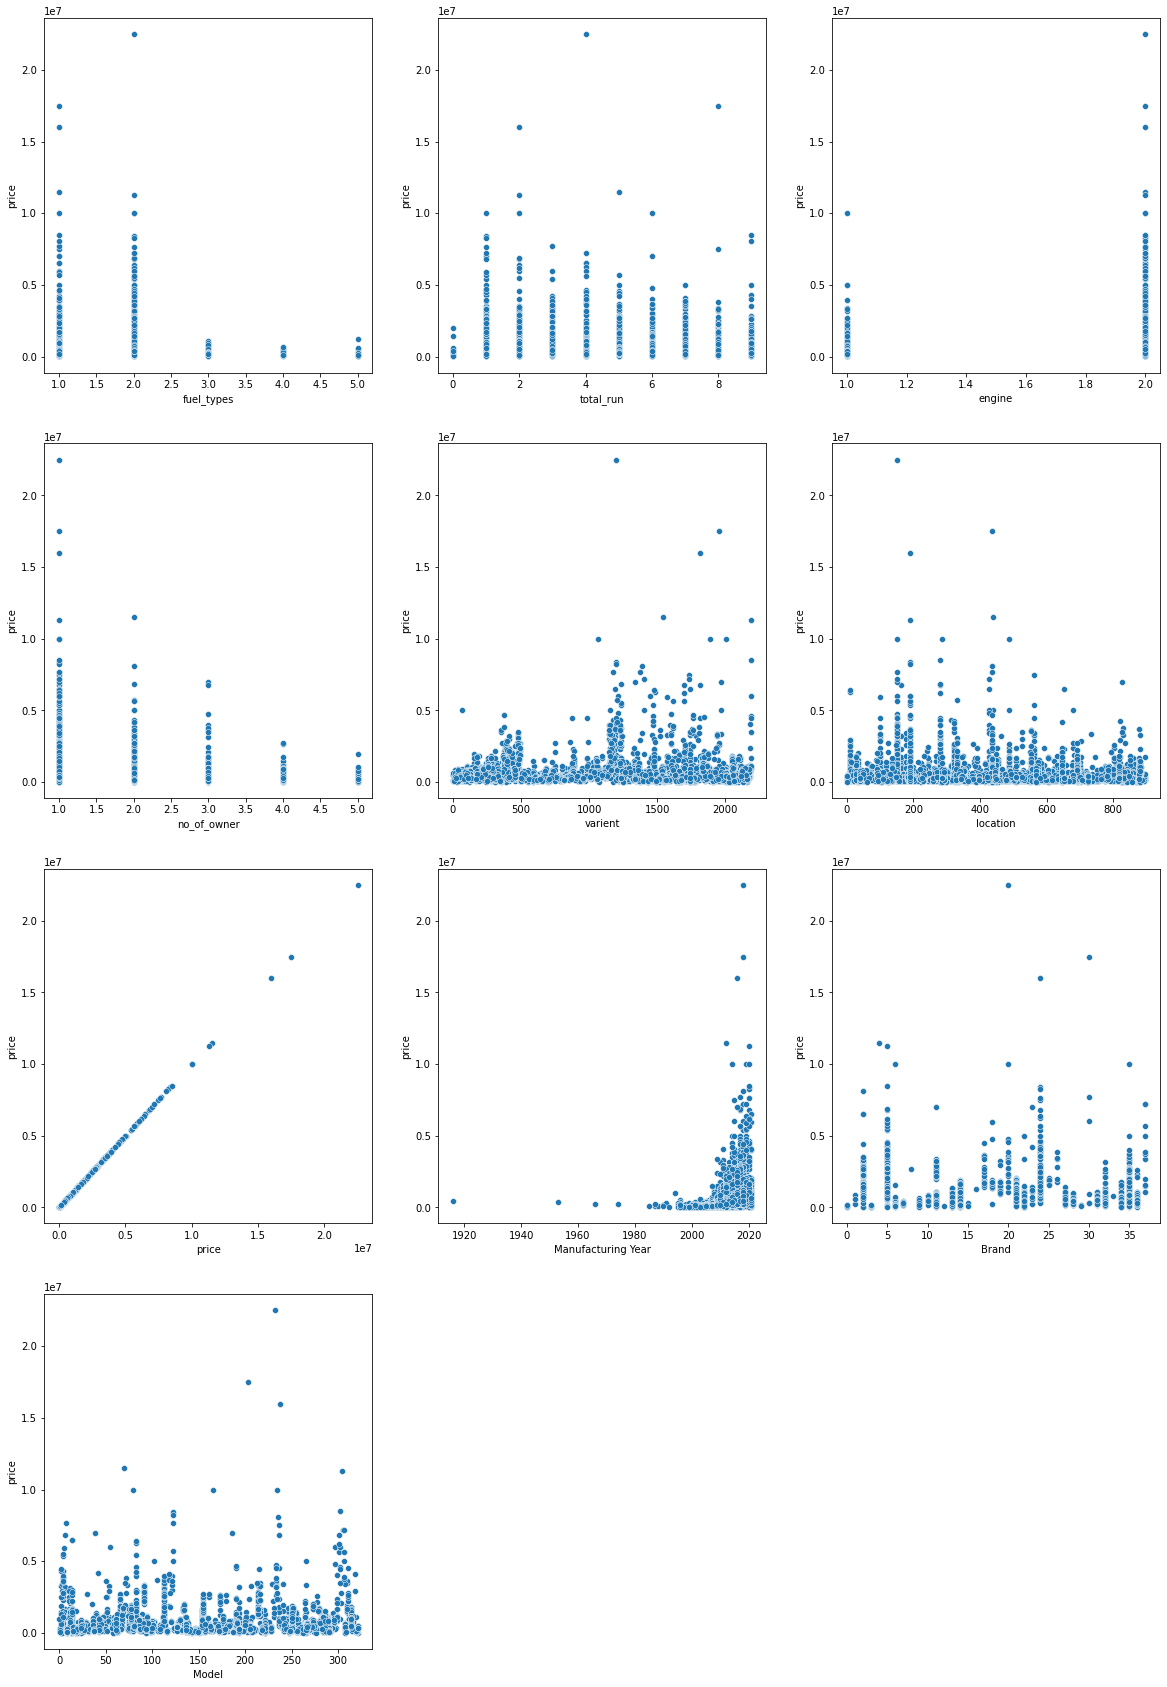

In [42]:
#bivariate Analysis
plotnumber = 1
plt.figure(figsize=(20,30))
for i in df:
    if plotnumber < 12:
        plt.subplot(4,3,plotnumber)
        sns.scatterplot(df[i],df['price'])
    plotnumber+=1
plt.show()

for current year the price of car is high as compare to previous year

for automatic engine the price of car is high

as the no of owner increase the price of car drops

for petrol and diesel fuel the price of car is high

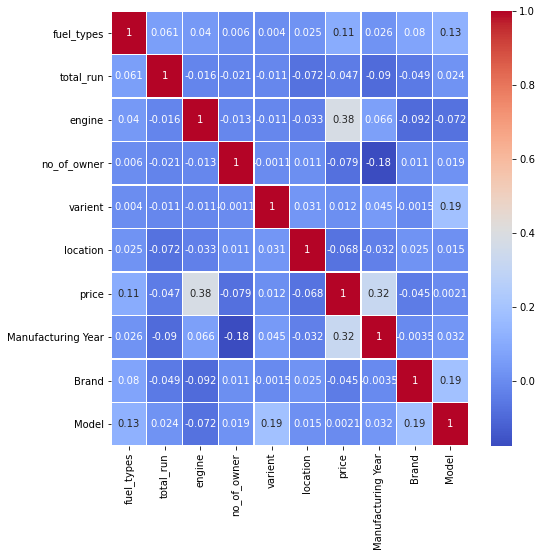

In [43]:
#multivariate analysis
col=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(col,cmap='coolwarm',annot=True,fmt=".2g",linewidths=.2)
plt.show()

we see only moderate correlation of price with manufacturing year , so there is no problem of multi colinearity

In [44]:
df.skew().to_frame()

0
fuel_types          1.310327
total_run          -0.008546
engine              1.680438
no_of_owner         1.762087
varient            -0.331115
location            0.393187
price               8.591086
Manufacturing Year -2.486987
Brand               0.183758
Model               0.024278

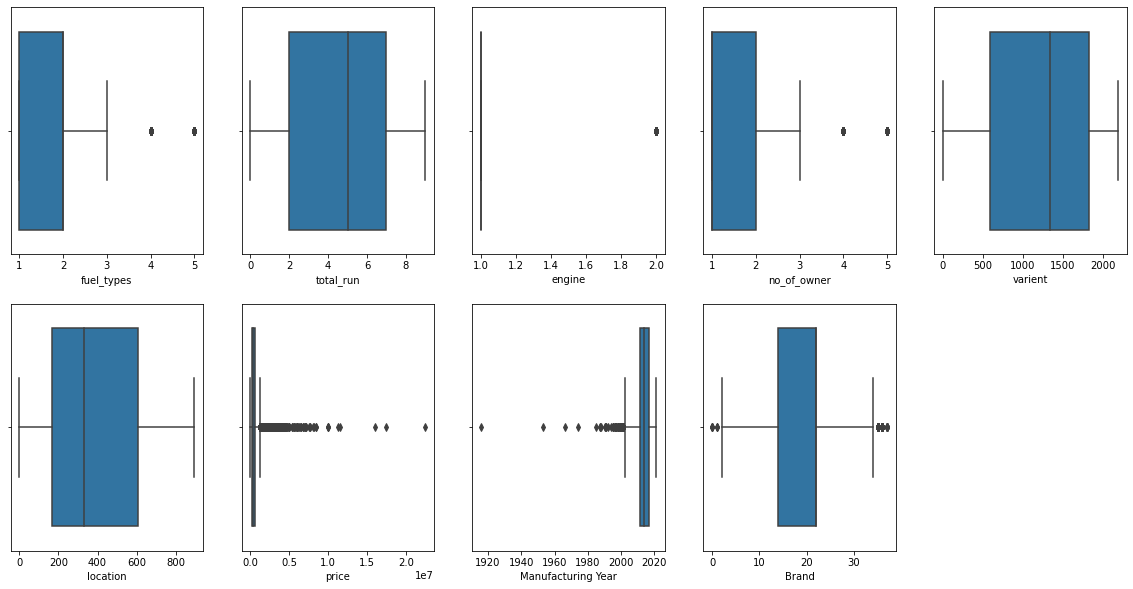

In [45]:
#plotting box plot to see outliers
plt.figure(figsize=(20,10))
plotnumber = 1
for i in df:
    if plotnumber < 10:
        plt.subplot(2,5,plotnumber)
        sns.boxplot(df[i])
        plotnumber+=1
plt.show()

there is outlier in price

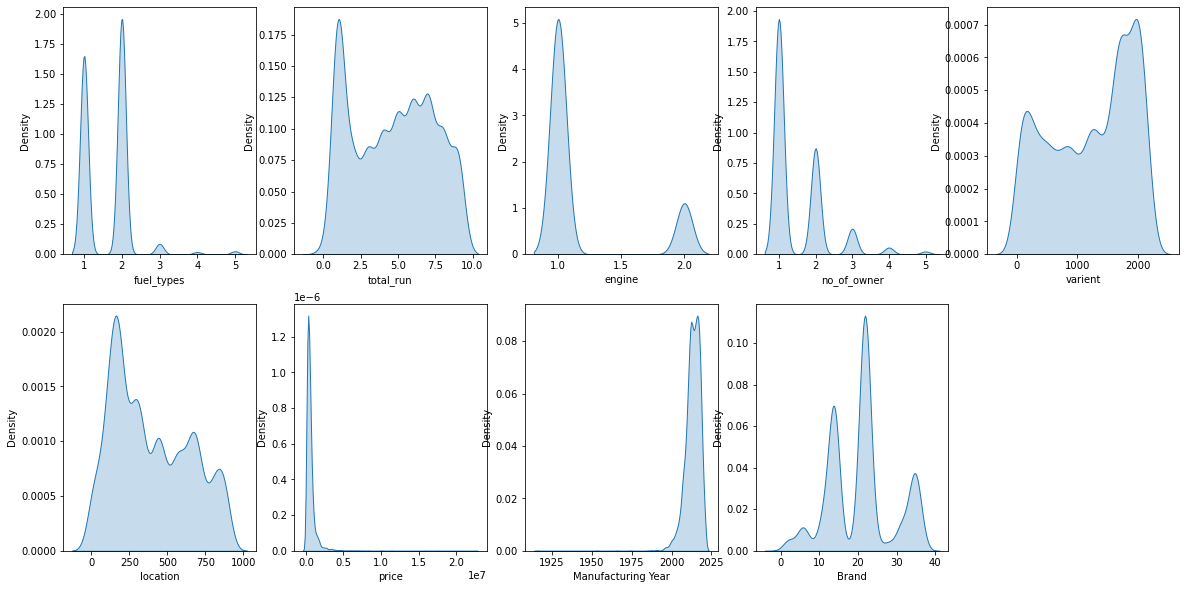

In [46]:
#plotting kde plot to see outliers
plt.figure(figsize=(20,10))
plotnumber = 1
for i in df:
    if plotnumber < 10:
        plt.subplot(2,5,plotnumber)
        sns.kdeplot(df[i],fill=True)
        plotnumber+=1
plt.show()

In [47]:
# for removing outliers
from scipy.stats import zscore

In [48]:
zscr=zscore(df[["price","Manufacturing Year"]])
abs_score=np.abs(zscr)

In [49]:
filter=((abs_score<2.9)&(abs_score>-2.9)).all (axis=1)

In [50]:
new=df[filter]

In [51]:
new.shape

(7206, 10)

In [52]:
print("Data Loss percent is :",((8000-7206)/8000)*100)

Data Loss percent is : 9.925


In [53]:
new.skew()

fuel_types            1.294615
total_run            -0.018028
engine                1.801349
no_of_owner           1.764305
varient              -0.313031
location              0.385290
price                 2.253250
Manufacturing Year   -0.583904
Brand                 0.210408
Model                 0.020720
dtype: float64

except price all the other column are categorical so we dont take care of skewness of categorical column

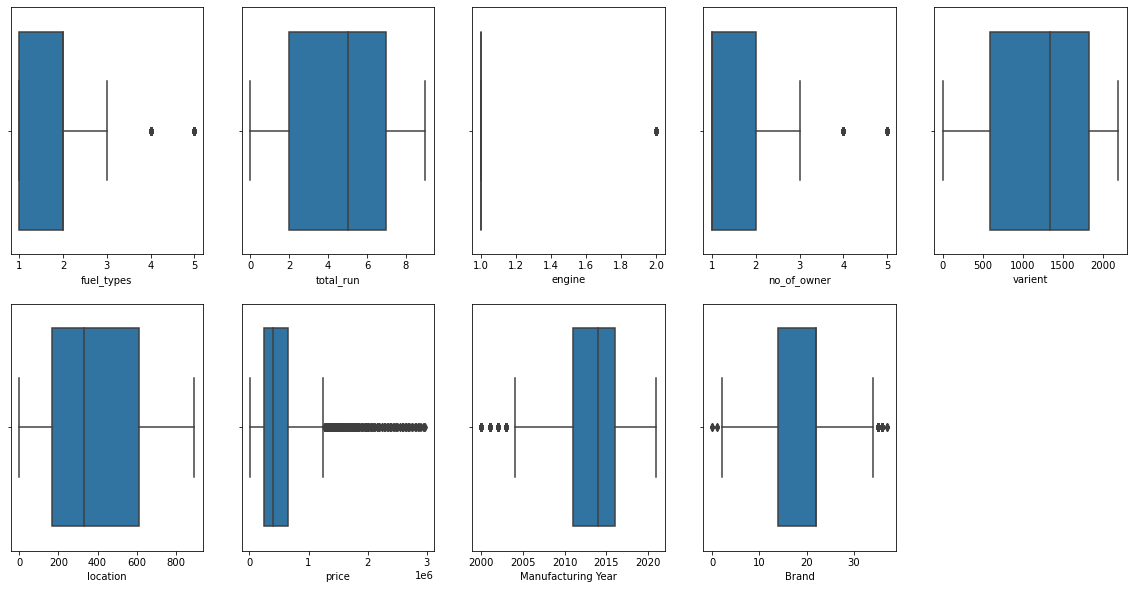

In [54]:
#plotting box plot to see outliers
plt.figure(figsize=(20,10))
plotnumber = 1
for i in new:
    if plotnumber < 10:
        plt.subplot(2,5,plotnumber)
        sns.boxplot(new[i])
        plotnumber+=1
plt.show()

In [55]:
#spliting dataset
x=new.drop(columns=["price"],axis=1)
y=new['price']

In [56]:
# model building
from sklearn.linear_model import LinearRegression,Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [57]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=160)

# XGBRegressor

In [101]:
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
y_pred = xg.predict(x_test)

In [103]:
a=r2_score(y_test,y_pred)

In [104]:
c=cross_val_score(xg,x_scaled,y,cv=5).mean()

In [105]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.8525166830629225 
 cross validation score : 0.8051342793219618


In [106]:
acc= []
cv = []
diff = []
acc.append(a)
cv.append(c)
diff.append(a-c)

# BaggingRegressor

In [108]:
bg=BaggingRegressor()
bg.fit(x_train,y_train)

BaggingRegressor()

In [109]:
y_pred=bg.predict(x_test)

In [110]:
a=r2_score(y_test,y_pred)

In [111]:
c=cross_val_score(bg,x_scaled,y,cv=5).mean()

In [112]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.8007816735797859 
 cross validation score : 0.7526336580964414


In [113]:
acc.append(a)
cv.append(c)
diff.append(a-c)

# RandomForestRegressor

In [115]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [116]:
y_pred=rf.predict(x_test)

In [117]:
a=r2_score(y_test,y_pred)

In [118]:
c=cross_val_score(rf,x_scaled,y,cv=5).mean()

In [119]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.8246852495977541 
 cross validation score : 0.7701285698197292


In [120]:
acc.append(a)
cv.append(c)
diff.append(a-c)

# GradientBoostingRegressor

In [122]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [123]:
y_pred=gb.predict(x_test)

In [124]:
a=r2_score(y_test,y_pred)

In [125]:
c=cross_val_score(gb,x_scaled,y,cv=5).mean()

In [126]:
print("r-2 score : ",a,"\n","cross validation score :",c)

r-2 score :  0.7713587898706393 
 cross validation score : 0.7212694961395741


In [127]:
acc.append(a)
cv.append(c)
diff.append(a-c)

In [128]:
model = ["XGBRegressor","BaggingRegressor","RandomForestRegressor","GradientBoostingRegressor"]

In [129]:
regressor = pd.DataFrame({"MODEL":model,"Accuracy score":acc,"Cross_validation_Score":cv,"Difference":diff})

regressor

MODEL  Accuracy score  Cross_validation_Score  \
0               XGBRegressor        0.852517                0.805134   
1           BaggingRegressor        0.800782                0.752634   
2      RandomForestRegressor        0.824685                0.770129   
3  GradientBoostingRegressor        0.771359                0.721269   

   Difference  
0    0.047382  
1    0.048148  
2    0.054557  
3    0.050089

xgb is my best model

# hyper para meter tunning

In [142]:
param_search ={"n_estimators":[100,300,500],
              "random_state":[100,140,150],
              "max_depth":[4,10,15]}

In [143]:
grid_search = GridSearchCV(xg,param_grid=param_search,cv=4)

In [144]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [145]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 500, 'random_state': 100}

In [146]:
xg = XGBRegressor(max_depth=4,random_state=100,n_estimators=500)

In [147]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=100,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
y_pred = xg.predict(x_test)

In [149]:
print("r-2 score : ",r2_score(y_test,y_pred),"\n","cross validation score :",cross_val_score(xg,x_scaled,y,cv=5).mean())

r-2 score :  0.8604736752419997 
 cross validation score : 0.823190135196245


# saving best model

In [150]:
import pickle
pickle.dump(gb,open('car_price.pk1','wb'))

In [151]:
load_model = pickle.load(open('car_price.pk1','rb'))